<a href="https://colab.research.google.com/github/Styler10/ML2025/blob/main/Prac_3_Vol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve)
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("student_depression_dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print('Размер:', df.shape)
print('\nИнформация о признаках:')
print(df.dtypes.to_frame('dtype'))

print('\nКоличество пропусков по столбцам:')
print(df.isna().sum())


Размер: (27901, 18)

Информация о признаках:
                                         dtype
id                                       int64
Gender                                  object
Age                                    float64
City                                    object
Profession                              object
Academic Pressure                      float64
Work Pressure                          float64
CGPA                                   float64
Study Satisfaction                     float64
Job Satisfaction                       float64
Sleep Duration                          object
Dietary Habits                          object
Degree                                  object
Have you ever had suicidal thoughts ?   object
Work/Study Hours                       float64
Financial Stress                        object
Family History of Mental Illness        object
Depression                               int64

Количество пропусков по столбцам:
id                         

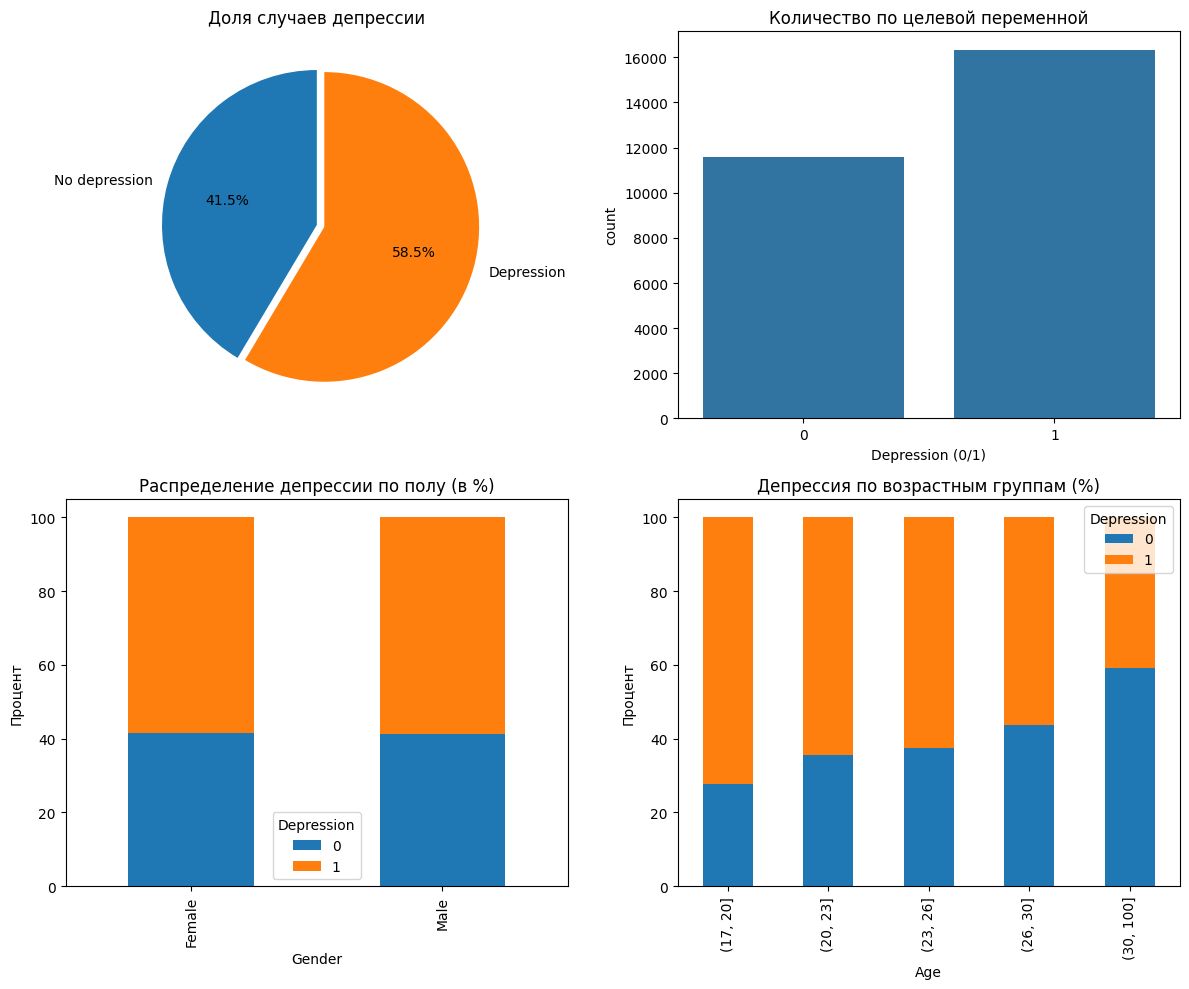

In [ ]:
target = 'Depression'

plt.figure(figsize=(12,10)) # создаем большое полотно

# 1) Круговая диаграмма целевой переменной
plt.subplot(2,2,1)
sizes = df[target].value_counts().reindex([0,1]).fillna(0)
labels = ['No depression','Depression']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode=(0,0.05))
plt.title('Доля случаев депрессии')

# 2) Простая гистограмма/количество случаев
plt.subplot(2,2,2)
sns.countplot(x=target, data=df)
plt.title('Количество по целевой переменной')
plt.xlabel('Depression (0/1)')

# 3) Процент по полу (если есть столбец Gender)
plt.subplot(2,2,3)
gender_ct = pd.crosstab(df['Gender'], df[target], normalize='index')*100
gender_ct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.ylabel('Процент')
plt.title('Распределение депрессии по полу (в %)')


# 4) По возрастным группам
plt.subplot(2,2,4)
bins = [0,17,20,23,26,30,100]
groups = pd.cut(df['Age'], bins=bins)
age_ct = pd.crosstab(groups, df[target], normalize='index')*100
age_ct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Депрессия по возрастным группам (%)')
plt.ylabel('Процент')

plt.tight_layout()

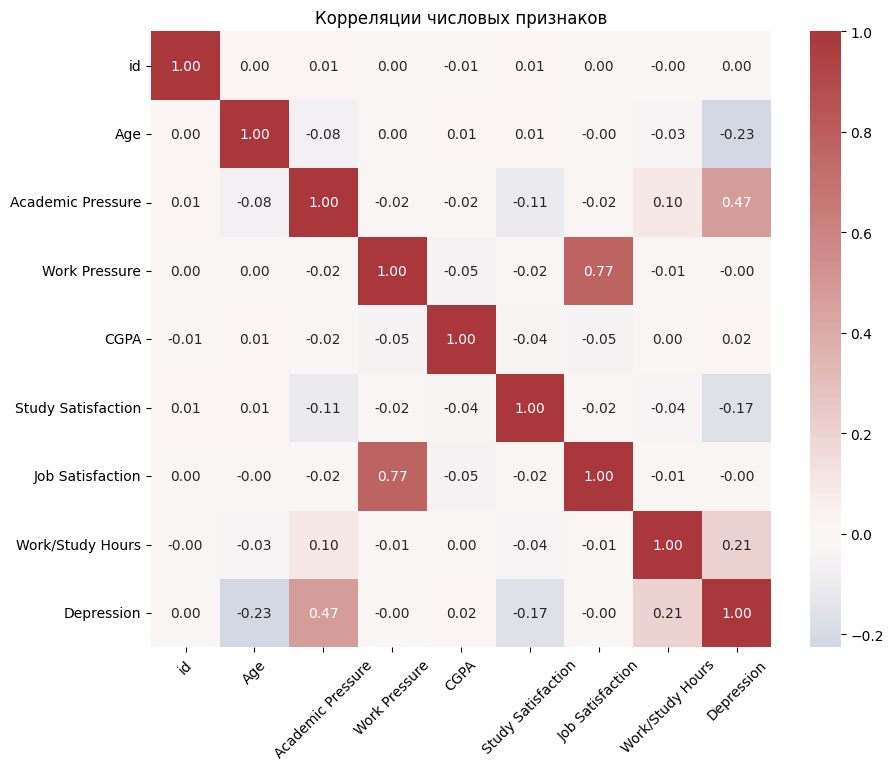

In [ ]:
# Корреляционная матрица для числовых признаков
num_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(), annot=True, fmt='.2f', cmap='vlag', center=0)
plt.title('Корреляции числовых признаков')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Work Pressure, Job Satis, CGPA - связи около нуля -> не влияют

Academic Pressure - чем больше давления, тем больше депрессии

Age: -0,23 -> слабая отрицательная связь. С увеличением возраста склонность к признакам депрессии в среднем постепенно уменьшается

Study Satisfaction: -0,17 -> отрицательную связь. Выше уровень удовлетворенности учебным процессом соответствует лучшему психическому благополучию

Work/Study Hours: -0,21 -> увеличение учебной нагрузки может повышать уровень стресса

In [ ]:
best_features = ["Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction", "Job Satisfaction", "Work/Study Hours", "Gender"]
#для каждого признака формируем таблицу сопряженности
for i in best_features:
    table = pd.crosstab(df[i], df["Depression"])

    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{i} и Depression: p-value - {p}")

Age и Depression: p-value - 0.0
Academic Pressure и Depression: p-value - 0.0
Work Pressure и Depression: p-value - 0.47877205879148477
CGPA и Depression: p-value - 2.7855510142165158e-11
Study Satisfaction и Depression: p-value - 2.1456768781560704e-169
Job Satisfaction и Depression: p-value - 0.8061451100925779
Work/Study Hours и Depression: p-value - 1.3366925835170254e-268
Gender и Depression: p-value - 0.7706429931308504


In [ ]:
df.isnull().sum().sum()# проверяем пропуски

np.int64(0)

In [ ]:
df["Financial Stress"].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

In [ ]:
print((df['Financial Stress'] == '?').sum())
df = df[df['Financial Stress'] != '?']
df['Financial Stress'] = df['Financial Stress'].astype(float)

3


In [ ]:
categorial_features  = list(df.select_dtypes(include=['object']).columns)# выделяем категориальные
numeric_features = list(df.select_dtypes(include=['float', 'int']).columns)# выделяем числовые

binary_cols = [i for i in categorial_features if df[i].nunique() == 2]
caterigal_cols = [i for i in categorial_features if df[i].nunique() > 2]

le = LabelEncoder() # кодируем бинарные
for i in binary_cols:
    df[i] = le.fit_transform(df[i])

encoder = OneHotEncoder(sparse_output=False)#кодируем большие
encoded = encoder.fit_transform(df[caterigal_cols])

X_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())
X_encoded


df = df.drop(caterigal_cols, axis=1)
df = pd.concat([df.reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

In [ ]:
df

,id,Gender,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,...,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD
0,2,1,33.0,5.0,0.0,8.97,2.0,0.0,1,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8,0,24.0,2.0,0.0,5.90,5.0,0.0,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,1,31.0,3.0,0.0,7.03,5.0,0.0,0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30,0,28.0,3.0,0.0,5.59,2.0,0.0,1,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,0,25.0,4.0,0.0,8.13,3.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,140685,0,27.0,5.0,0.0,5.75,5.0,0.0,1,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27894,140686,1,27.0,2.0,0.0,9.40,3.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27895,140689,1,31.0,3.0,0.0,6.61,4.0,0.0,0,12.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
27896,140690,0,18.0,5.0,0.0,6.88,2.0,0.0,1,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = df.drop("Depression", axis=1)# за х берем все, кроме депрессии
y = df.Depression # целевая переменная

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # выделяем 75 на обучение и 25 на тест

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказания и оценки
y_pred = clf.predict(X_test)

print('Accuracy (доля всех правильных предсказаний):', accuracy_score(y_test, y_pred))
print('Precision (действительно с депрессией по метке модели):', precision_score(y_test, y_pred, zero_division=0))
print('Recall (у кого реально депрессия):', recall_score(y_test, y_pred, zero_division=0))
print('F1:', f1_score(y_test, y_pred, zero_division=0))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.7949820788530466
Precision: 0.8036330190848471
Recall: 0.8585114222549742
F1: 0.830166270783848
ROC AUC: 0.7822171436343741


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


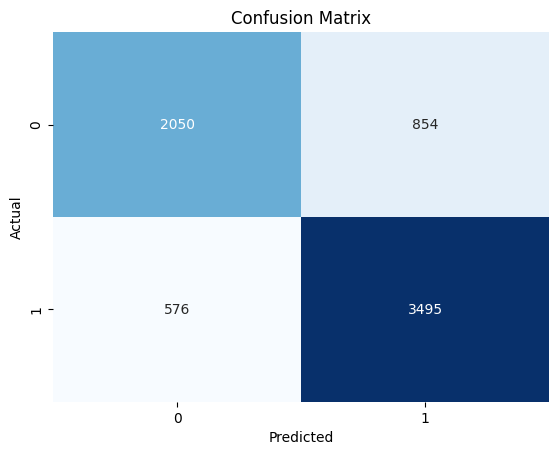

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()